<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=550, height=300></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Как Вы уже знаете в современных задачах обработки изображений, будь то задача обнаружения объектов, задача распознавания образов, задача (семантической) сегментации, задача классификации изображений и другие, всё чаще используют **свёрточные нейросети** (*Convolutional Neural Networks*, *CNN*).

Они показывают очень хорошие результаты, за ними стоит как [математический аппарат](https://stats.stackexchange.com/questions/269854/are-there-mathematical-reasons-for-convolution-in-neural-networks-beyond-expedie), так и эвристики, полученные опытным путём.

В данном задании Вам предстоит познакомиться с архитектурами *AlexNet*, *VGG* и *Inception* и для каждой из этих моделей использовать технику **Transfer Learning**.  

* **Transfer Learning** - это процесс дообучения на **новых данных** какой-либо нейросети, уже обученной до этого на других данных, обычно на каком-нибудь хорошем, большом (миллионы картинок) датасете (например, [ImageNet](http://www.image-net.org/) ~ 14 млн картинок).

<h2 style="text-align: center;"><b>AlexNet</b></h2>

**AlexNet** - нейронная сеть, которая победила в ILSVRC (соревнование по классификации картинок из ImageNet) в 2012 году и стала основой для многих других архитектур. Впервые она была представлена в статье  “ImageNet Classification with Deep Convolutional Neural Networks”, над которой работал Джоффри Хинтон - человек, которого многие называют отцом современного computer vision.

Архитектура описана на картинке ниже

<img src="https://www.learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png">

**AlexNet** состоит из 5 **сверточных** слоев, 3 **MaxPool** слоев и 2 **FullyConnected** слоев в конце. Обратите внимание, что в последнем пулинг слое окна, из которых берется максимум, пересекаются за счет того, что *stride*=2. Это изменение по сравнению с традиционным пулингом помогло снизить ошибку на 0.4%.

По сути **AlexNet** это самая базовая архитектура для сверточной сети после LeNet, которую мы уже писали на предыдущем занятии.

<h2 style="text-align: center;"><b>VGG</b></h3>

Один **сверточный** слой с фильтром 5$\times$5 можно заменить двумя подряд идущими слоями с фильтрами размером 3$\times$3, так как **воспринимаемая область** картинки у них будет одинаковой. При этом уменьшиться количество параметров, поэтому такую сеть будет легче обучать.

На момент создания VGG люди уже заметили, что чем больше слоев в нейросети, тем выше ее точность. Заменяя большие фильтры на несколько фильтров 3$\times$3 исследователи получили глубокую нейросеть с меньшим количеством параметров. Архитектура VGG-16 (версии VGG с 16 слоями) представлена на картинке ниже:


<img src="https://cdn-images-1.medium.com/max/1040/1*0Tk4JclhGOCR_uLe6RKvUQ.png">

Когда говорят **VGG**, то чаще всего имеют ввиду **VGG-16** или **VGG-19**. Более глубоких версий **VGG** нет, так как после 19 слоев точность начинает падать.

Чтобы добиться высоких результатов в соревновании при обучении и валидации нейросети использовались дополнительные премы, подробнее о которых можно прочитать в [статье на Medium](https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11).


<h2 style="text-align: center;"><b>Inception v1</b></h3>

### Рассмотрим идею, которая подтолкнула исследователей к созданию этой архитектуры.

Площадь, которую занимает классифицируемый объект, может очень сильно отличаться. Пример на картинке ниже:

<img src="https://cdn-images-1.medium.com/max/1040/1*aBdPBGAeta-_AM4aEyqeTQ.jpeg">

* Для извлечения информации с большой площади лучше всего подходят **большие** фильтры, и наоборот для маленьких объектов лучше **маленькие** фильтры.
* Глубокие нейронные сети намного сложнее обучать: в них появляется проблема **затухания градиента** и они **переобучаются**.
Чтобы решить первую проблему исследователи придумали **Incepton** модуль, который применяет фильтры разного размера и затем склеивает полученные каналы. При этом извлекается как информация из больших объектов, так и из маленьких. Простейшая реализация модуля выглядит так:
<img src="https://cdn-images-1.medium.com/max/1040/1*DKjGRDd_lJeUfVlY50ojOA.png">

Реализацию можно сделать более эффективной, если сначала уменьшить количество каналов с помощью **сверточного слоя** 1$\times$1 и лишь затем применить **слой** с фильтрами 5$\times$5. Сокращение вычислений происходит за счет того, что мы сначала **уменьшаем размерность** данных и лишь затем преобразовываем их. Продвинутая реализация:
<img src="https://cdn-images-1.medium.com/max/1040/1*U_McJnp7Fnif-lw9iIC5Bw.png">

Сеть состоит из **корня** (нескольких сверточных слоев) и **Inception** модулей идущих за ним. Оранжевым прямоугольников выделен корень, а фиолетовыми - **вспомогательные классификаторы**. Именно они помогают бороться со второй проблемой, которую мы упомянули ранее. Наша функция потерь - взвешенная сумма **LogLoss** на двух **вспомогательных классификаторах** и **основном** в конце нейронной сети.
<img src="https://cdn-images-1.medium.com/max/1040/1*uW81y16b-ptBDV8SIT1beQ.png">

После Inception v1 были представлены 2, 3 и 4 версии, пррочитать о которых вы можете  в [статье на Medium](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202).

Однако сейчас научились иначе бороться с затуханием градиентов с помощью **residual conncection**. Это позволило увеличить число слоев в нейронной сети.

![](https://i.imgur.com/XwcnU5x.png)

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Теперь мы перейдем к тому, как можно использовать уже обученные нейросети, чтобы ускорить свою работу.

Давайте вспомним общую архитектуру CNN:

<img src="https://drive.google.com/uc?id=14pApKqQjnmWMXazY0HHjREn9rI9uwCQg">

С помощью операций *свёртки (convolution)* и *пулинга (pooling)* всё, что расположено до этапа *classification*, по сути **извлекает признаки из объектов, подающихся на вход** (картинок, в данном случае). То есть вместо того, чтобы самим пытаться как-то описать картинки для хорошей работы классификатора, мы предоставляем заняться этим нейросети (обучая её методом обратного распространения ошибки ([лекция 4](https://www.youtube.com/watch?v=HZDOhHAg5_g))).

**Вопрос (творческий):**  А какие признаки для картинок приходят Вам в голову? (считать, что картинки цветные (3 канала), все одинакового размера)

**Ответ:** <Ваши мысли>

Представим теперь, что eсть свой набор данных, и Вы хотите научить сеть классифицировать объекты из Вашей выборки.  


Надеемся, что теперь Вам стало понятнее, как обучать крутые сети на новых данных.

<h2 style="text-align: center;"><b>Переходим к практике</b></h3>

<p style="text-align: center;"><i>(основано на http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)</i></p>

Мы будем пользоваться библиотекой PyTorch. Если Вы её ещё не установили, то вот [инструкция на Wiki по установке PyTorch](https://github.com/deepmipt/dlschl/wiki/%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%86%D0%B8%D1%8F-%D0%BF%D0%BE-%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5-PyTorch).

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os

### В чём состоит задание

Вам предстоит попробовать использовать  типа архитектур свёрточных нейросетей - **AlexNet (сделано за Вас в примере), VGG16, Inception_v3** - как *Feature Extractor*, с помощью *Fine Tuning* и *"из коробки"*.

**Для каждого пункта нужно:**
- вывести график loss'а на обучающей и на валидационной выборке
- вывести качество модели (accuracy)

### Данные  

В данном задании используются сети (из библиотеки **torchvision**), предобученные на датасете ImageNet.  
В качестве новых данных будет датасет Меравьи vs Пчёлы, Вам нужно скачать его отсюда: **[Муравьи vs Пчёлы](https://download.pytorch.org/tutorial/hymenoptera_data.zip)**, *являющийся частью датасета ImageNet*. В нём 400 картинок, ~250 обучение и ~150 валидация (тест).

### Функции для отрисовки и обучения модели:

* Загрузим данные:

In [2]:
# локально - вручную
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [3]:
# Преобразование обучающих данных для расширения обучающей выборки и её нормализация
# Для валидационной (тестовой) выборки только нормализация
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# папка с данными. Если запускаете в колабе, нужно скопировать данные к себе в директорию и примонтировать диск. Если запускаете локально -- просто скачайте данные
data_dir = "C:\projects\Python\dl\DataBases\hymenoptera_data"
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
# специальный класс для загрузки данных в виде батчей

train_dataloader = torch.utils.data.DataLoader(

    image_datasets["train"], batch_size=32,
    shuffle=True
)
val_dataloader = torch.utils.data.DataLoader(
    image_datasets["val"], batch_size=128
)

loaders = {
    "train": train_dataloader,
    "valid": val_dataloader
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

Размеры обучающей и валидационной выборок:

In [4]:
dataset_sizes

{'train': 244, 'val': 153}

In [5]:
class_names

['ants', 'bees']

* Посмотрим на картинки из датасета:

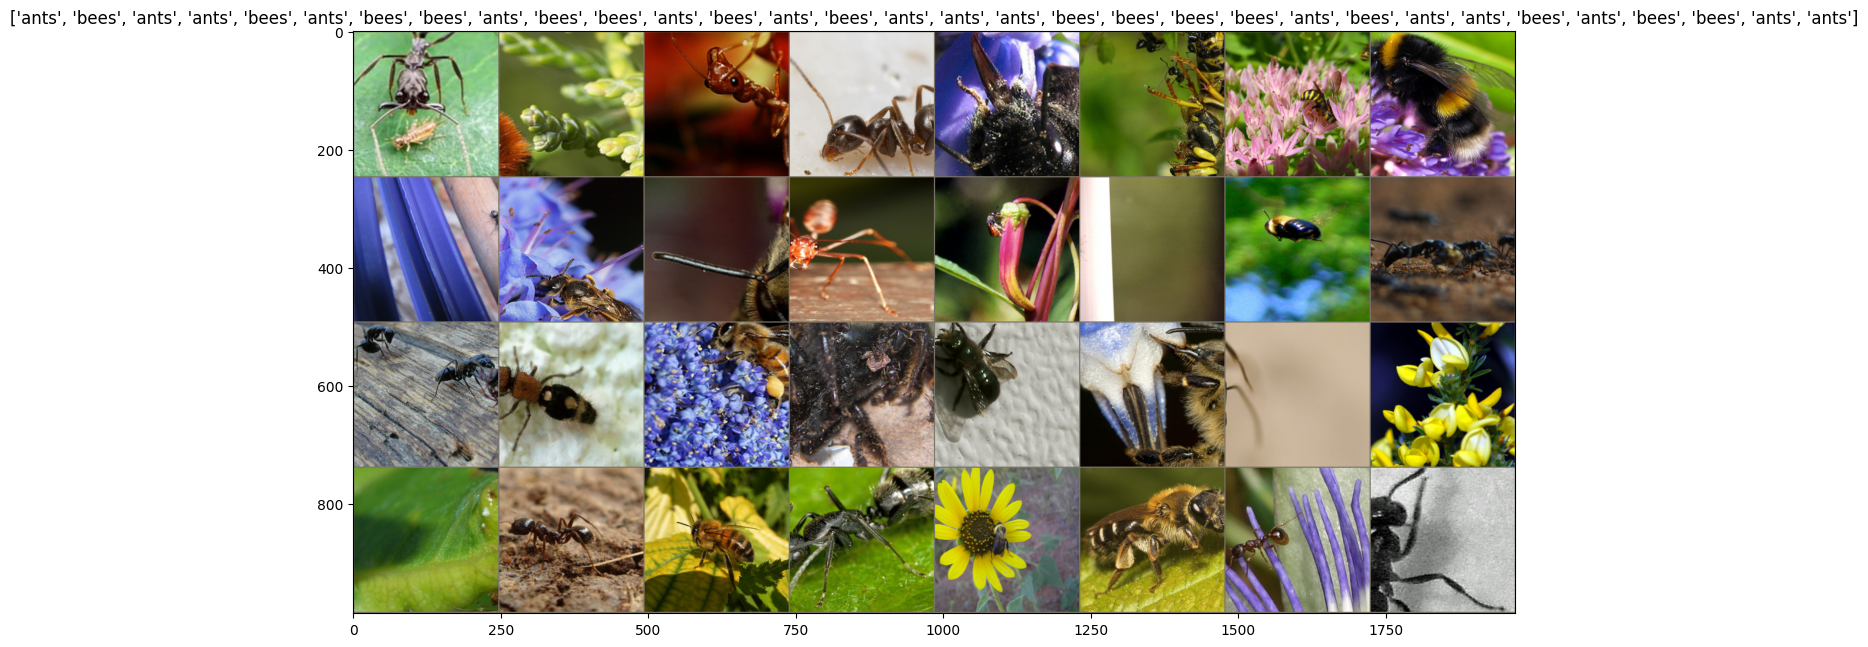

In [5]:
from matplotlib import pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))  # потому что в numpy цветовые каналы должны подаваться последней размерностью
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


# Получим 1 батч (картнки-метки) из обучающей выборки
inputs, classes = next(iter(loaders['train']))

# Расположим картинки рядом
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [9]:
image_datasets["train"][0]

(tensor([[[-0.6794, -0.6623, -0.6623,  ..., -0.7650, -0.7308, -0.6965],
          [-0.7137, -0.6965, -0.6623,  ..., -0.7308, -0.6965, -0.6965],
          [-0.8164, -0.7650, -0.7479,  ..., -0.6965, -0.6794, -0.6794],
          ...,
          [-0.6281, -0.6109, -0.6109,  ..., -2.0665, -2.0494, -2.0665],
          [-0.6281, -0.6281, -0.6109,  ..., -1.4158, -1.4158, -1.4843],
          [-0.6281, -0.6281, -0.6281,  ..., -0.6965, -0.6965, -0.6623]],
 
         [[ 0.5903,  0.6078,  0.6078,  ...,  0.6078,  0.6254,  0.6604],
          [ 0.5728,  0.5903,  0.6078,  ...,  0.6429,  0.6604,  0.6604],
          [ 0.6429,  0.6429,  0.5903,  ...,  0.6254,  0.6429,  0.6429],
          ...,
          [ 0.7654,  0.7829,  0.7829,  ..., -1.9832, -2.0007, -2.0182],
          [ 0.7654,  0.7654,  0.7829,  ..., -0.8452, -0.8803, -0.9328],
          [ 0.7654,  0.7654,  0.7654,  ...,  0.6954,  0.6604,  0.6954]],
 
         [[ 2.2740,  2.2914,  2.2914,  ...,  2.2566,  2.2740,  2.3088],
          [ 2.2391,  2.2566,

### Обучение моделей

Следующая функция будет использоваться для обучения модели. Аргументы:  
* model $-$ нейросеть
* loss $-$ оптимизируемая функция (criterion, cost function, objective)
* optimizer $-$ оптимизационный алгоритм
* scheduler $-$ политика изменения learning_rate
* num_epochs $-$ количество итераций обучения

### Задание

Для каждой из следующих нейросетей:
* **AlexNet** (уже сделано в примере)
* **VGG16**
* **Inception_v3**

Напишите код и выведите результат (график лосса, accuracy и вывод примера классификации картинок с визализацией (с помощью функции `vizualize_model()`)) для трёх способов:
* Использование готовой нейросети **"из коробки"**
* Использование нейросети как **Feature Extractor**
* **Fine Tuning** нейросети

Для каждого пункта нужно:
* сделать с сетью то, что нужно в пункте ("из коробки", FE или FT)
* вывести график loss'а на обучающей и на валидационной выборке
* вывести качество модели (accuracy) на валидационной (тестовой) выборке
* (по желанию) использовать функцию visualize_model()

### AlexNet

*ПРИМЕЧАНИЕ: Здесь не выведены графики loss'а и не использована visualize_model(). От Вас это ожидается.*

Загрузка модели:

In [6]:
model = models.alexnet(pretrained=True)

c:\interpreter\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\interpreter\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Посмотрим, что внутри:

In [7]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Видим, что на вход классификатору (classifier) подаётся *9216 признаков*. Это и будет размер входа для нашего нового классификатора.

* **Fine Tuning** способ

Сконфигурируем - изменим FC-слой и зададим *cost function* и *оптимизирующий алгоритм*:

(*по умолчанию backpropagation распространяется на все слои, поэтому здесь мы только заменяем FC-слой на свой классификатор*)

In [8]:
!rm -rf logs

"rm" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [9]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier[6] = nn.Linear(num_features, 2)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

### Не разобрался в использовании tensorboard (MLFlow лучше)

In [22]:
%reload_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 6708), started 1 day, 0:59:06 ago. (Use '!kill 6708' to kill it.)

### Мой класс для тренировки

In [10]:
import sys

sys.path.append(fr"C:\projects\Python\torchlab")

In [11]:
from training import Trainer

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [13]:
trainer = Trainer(
    model=model.to(device),
    criterion=nn.CrossEntropyLoss(),
    optimizer=optimizer,
    device=device,
    train_loader=train_dataloader,
    test_loader=val_dataloader,
    scheduler=optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
    )

new one


In [14]:
trainer.train_model()

Epoch 1/100 - Train Loss: 0.5928, Train Accuracy: 0.7336, Valid Loss: 0.2784, Valid Accuracy: 0.8954 - Time: 2.09s


Epoch 2/100 - Train Loss: 0.2314, Train Accuracy: 0.9057, Valid Loss: 0.3637, Valid Accuracy: 0.9020 - Time: 1.39s


Epoch 3/100 - Train Loss: 0.2562, Train Accuracy: 0.8730, Valid Loss: 0.3061, Valid Accuracy: 0.9020 - Time: 1.41s


Epoch 4/100 - Train Loss: 0.2344, Train Accuracy: 0.9057, Valid Loss: 0.2857, Valid Accuracy: 0.9085 - Time: 1.40s


Epoch 5/100 - Train Loss: 0.2133, Train Accuracy: 0.8975, Valid Loss: 0.3224, Valid Accuracy: 0.9020 - Time: 1.39s



Early stopping triggered after 5 epochs


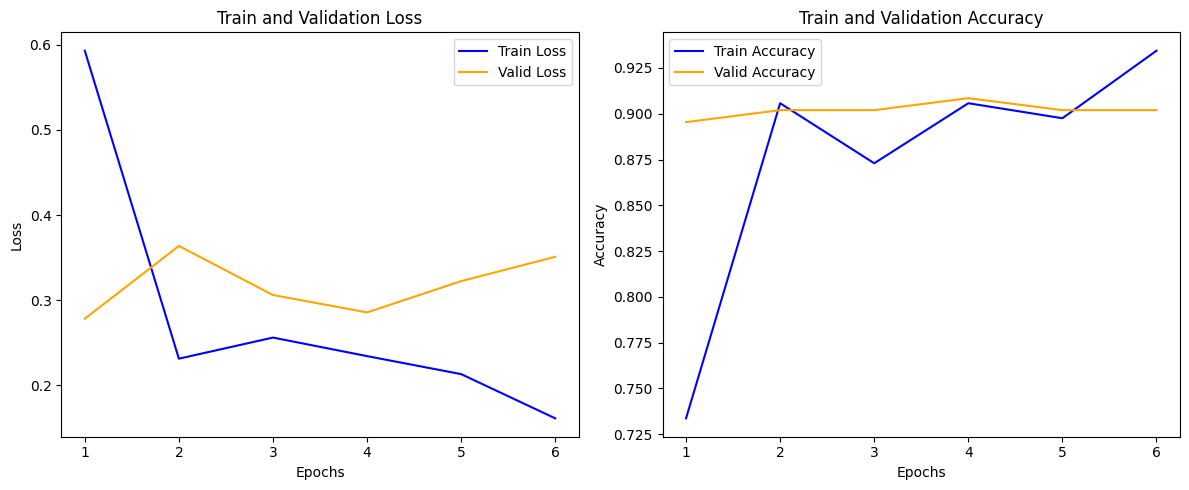

In [15]:
trainer.plot_metrics()

In [24]:
m = trainer.model
torch.save(m.state_dict(), 'model_al')

In [27]:
m = model
m.load_state_dict(torch.load('model_al', weights_only=True))

<All keys matched successfully>

In [30]:
m.eval()
a = torch.randn(3, 244, 244).unsqueeze(0).to(device)
m(a)

tensor([[ 1.0090, -1.1544]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Catalyst не работает

In [ ]:
'''import collections
setattr(collections, "MutableMapping", collections.abc.MutableMapping)'''
from catalyst import dl, metrics

class ImgRunner(dl.Runner):

    def predict_batch(self, batch):
        # model inference step
        return self.model(batch[0].to(self.device).view(batch[0].size(0), -1))

    def handle_batch(self, batch):
        # model train/valid step
        x, y = batch
        self.input = {"targets": y}
        y_hat = self.model(x)
        self.output = {"logits": y_hat}

In [41]:
class ImgRunner(dl.Runner):

    def handle_batch(self, batch):
        # Получаем данные из батча
        x, y = batch
        # Перемещаем данные на нужное устройство (CPU или GPU)
        x = x.to(self.device)
        y = y.to(self.device)

        # Прямой проход через модель
        y_hat = self.model(x)

        # Сохраняем предсказания и истинные значения в выходных данных
        self.input = {"targets": y}
        self.output = {"logits": y_hat}

In [48]:
runner = ImgRunner()
runner.train(
    model=model,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss"),
        dl.OptimizerCallback(metric_key='loss'),
        dl.AccuracyCallback(input_key="logits", target_key="targets")
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    #main_metric="accuracy01",
    #minimize_metric=False,
    logdir="logs/alexnet"
)

TypeError: Accelerator.__init__() got an unexpected keyword argument 'fp16'

* **Feature Extractor** способ:

In [29]:
model_extractor = models.alexnet(pretrained=True)

c:\interpreter\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\interpreter\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Помним, что по-умолчанию все слои нейросети обучаются заново:

In [30]:
for param in model_extractor.parameters():
    print(param.requires_grad)
    break

True


Сделаем так, чтобы на них *не распространялся backpropagation* (заморозим их), и подменим классификатор (ведь старый уже с весами для ImageNet'а).

In [31]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier[6] = nn.Linear(num_features, 2)

# Обучаем только классификатор
optimizer = optim.Adam(model_extractor.classifier[6].parameters(), lr=1e-4)

In [32]:
trainer = Trainer(
    model = model_extractor,
    criterion = nn.CrossEntropyLoss(),
    optimizer = optimizer,
    device = device,
    train_loader = train_dataloader,
    test_loader = val_dataloader,
    epochs = 20,
    scheduler=optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
)

In [33]:
trainer.train_model()

Epoch 1/20 - Train Loss: 0.6711, Train Accuracy: 0.5820, Valid Loss: 0.5242, Valid Accuracy: 0.6993 - Time: 1.45s


Epoch 2/20 - Train Loss: 0.5166, Train Accuracy: 0.7500, Valid Loss: 0.4919, Valid Accuracy: 0.7843 - Time: 1.23s


Epoch 3/20 - Train Loss: 0.4891, Train Accuracy: 0.7664, Valid Loss: 0.4726, Valid Accuracy: 0.8039 - Time: 1.31s


Epoch 4/20 - Train Loss: 0.5029, Train Accuracy: 0.7090, Valid Loss: 0.4638, Valid Accuracy: 0.8105 - Time: 1.34s


Epoch 5/20 - Train Loss: 0.4806, Train Accuracy: 0.7828, Valid Loss: 0.4604, Valid Accuracy: 0.8301 - Time: 1.29s


Epoch 6/20 - Train Loss: 0.4573, Train Accuracy: 0.7787, Valid Loss: 0.4586, Valid Accuracy: 0.8301 - Time: 1.22s


Epoch 7/20 - Train Loss: 0.4640, Train Accuracy: 0.8197, Valid Loss: 0.4577, Valid Accuracy: 0.8301 - Time: 1.25s


Epoch 8/20 - Train Loss: 0.4623, Train Accuracy: 0.7869, Valid Loss: 0.4572, Valid Accuracy: 0.8301 - Time: 1.27s


Epoch 9/20 - Train Loss: 0.4748, Train Accuracy: 0.7705, Valid Loss: 0.4570, Valid Accuracy: 0.8301 - Time: 1.32s


Epoch 10/20 - Train Loss: 0.4870, Train Accuracy: 0.7582, Valid Loss: 0.4569, Valid Accuracy: 0.8301 - Time: 1.28s


Epoch 11/20 - Train Loss: 0.4772, Train Accuracy: 0.7541, Valid Loss: 0.4569, Valid Accuracy: 0.8301 - Time: 1.40s


Epoch 12/20 - Train Loss: 0.4846, Train Accuracy: 0.7500, Valid Loss: 0.4568, Valid Accuracy: 0.8301 - Time: 1.38s


Epoch 13/20 - Train Loss: 0.4858, Train Accuracy: 0.7746, Valid Loss: 0.4568, Valid Accuracy: 0.8301 - Time: 1.31s


Epoch 14/20 - Train Loss: 0.4664, Train Accuracy: 0.7582, Valid Loss: 0.4568, Valid Accuracy: 0.8301 - Time: 1.32s


Epoch 15/20 - Train Loss: 0.4947, Train Accuracy: 0.7623, Valid Loss: 0.4568, Valid Accuracy: 0.8301 - Time: 1.32s


Epoch 16/20 - Train Loss: 0.4911, Train Accuracy: 0.7828, Valid Loss: 0.4568, Valid Accuracy: 0.8301 - Time: 1.35s


Epoch 17/20 - Train Loss: 0.4971, Train Accuracy: 0.7418, Valid Loss: 0.4568, Valid Accuracy: 0.8301 - Time: 1.23s


Epoch 18/20 - Train Loss: 0.4608, Train Accuracy: 0.7828, Valid Loss: 0.4568, Valid Accuracy: 0.8301 - Time: 1.32s


Epoch 19/20 - Train Loss: 0.4658, Train Accuracy: 0.8156, Valid Loss: 0.4568, Valid Accuracy: 0.8301 - Time: 1.58s


Epoch 20/20 - Train Loss: 0.4736, Train Accuracy: 0.7869, Valid Loss: 0.4568, Valid Accuracy: 0.8301 - Time: 1.23s


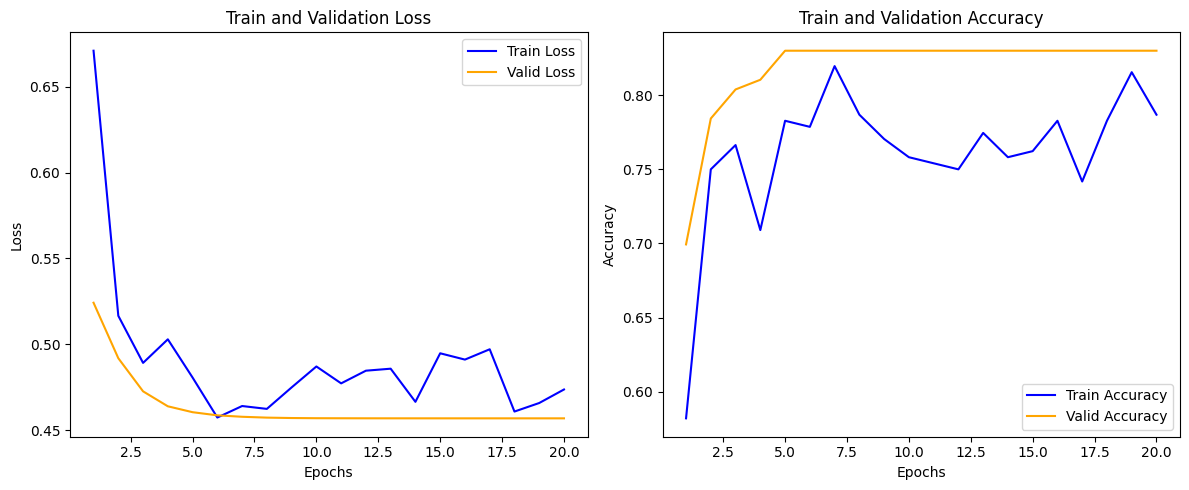

In [34]:
trainer.plot_metrics()

In [46]:
runner = ImgRunner()

runner.train(
    model=model_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(),
        dl.OptimizerCallback(),
        dl.AccuracyCallback()
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    main_metric="accuracy01",
    minimize_metric=False,
    logdir="logs/alexnet_freeze"
)

TypeError: CriterionCallback.__init__() missing 3 required positional arguments: 'input_key', 'target_key', and 'metric_key'

* **Смешанный** способ:
Мы будем обучать не только последний **fully connected** слой, но и несколько предпоследних

In [35]:
model_mixed = models.alexnet(pretrained=True)

In [36]:
model_mixed

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [37]:
model_mixed.features[:-5]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
)

In [38]:
from itertools import chain

'''
Функция chain() модуля itertools создает итератор, который возвращает элементы из первой iterables, 
пока она не будет исчерпана, а затем переходит к следующей iterables, 
пока все итерируемые последовательности не будут исчерпаны.
'''

layers_to_unfreeze = 5

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_mixed.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed.classifier[6] = nn.Linear(num_features, 2)

# Обучаем последние layers_to_unfreeze слоев из сверточной части и fully connected слой
# parameters() возвращает просто список тензоров парамтеров, поэтому два таких списка можно сложить
optimizer = torch.optim.Adam(
    chain(
        list(model_mixed.features.parameters())[-layers_to_unfreeze:],
        model_mixed.classifier.parameters()
    ),
    lr=1e-4,
)

In [39]:
trainer = Trainer(
    model = model_mixed,
    criterion = nn.CrossEntropyLoss(),
    optimizer = optimizer,
    device = device,
    train_loader = train_dataloader,
    test_loader = val_dataloader,
    epochs = 20,
    scheduler=optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
)

In [40]:
trainer.train_model()

Epoch 1/20 - Train Loss: 0.5942, Train Accuracy: 0.6639, Valid Loss: 0.3362, Valid Accuracy: 0.9020 - Time: 1.59s


Epoch 2/20 - Train Loss: 0.2818, Train Accuracy: 0.8852, Valid Loss: 0.2676, Valid Accuracy: 0.9020 - Time: 1.56s


Epoch 3/20 - Train Loss: 0.2389, Train Accuracy: 0.9098, Valid Loss: 0.2982, Valid Accuracy: 0.9150 - Time: 1.56s


Epoch 4/20 - Train Loss: 0.1979, Train Accuracy: 0.9098, Valid Loss: 0.3168, Valid Accuracy: 0.9150 - Time: 1.51s


Epoch 5/20 - Train Loss: 0.2145, Train Accuracy: 0.9016, Valid Loss: 0.3095, Valid Accuracy: 0.9150 - Time: 1.58s


Epoch 6/20 - Train Loss: 0.2109, Train Accuracy: 0.9262, Valid Loss: 0.3091, Valid Accuracy: 0.9150 - Time: 1.60s



Early stopping triggered after 6 epochs


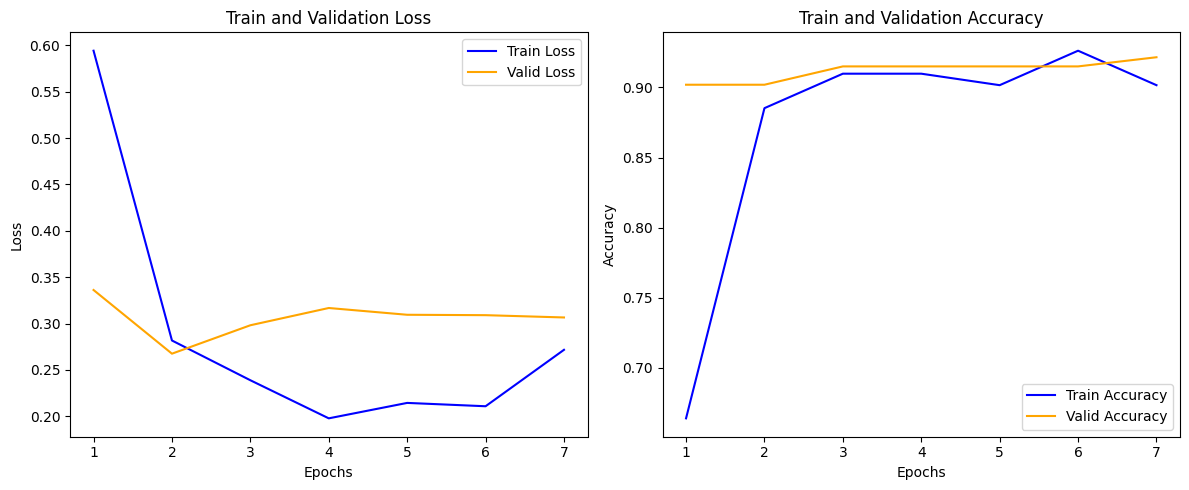

In [41]:
trainer.plot_metrics()

In [ ]:
runner = ImgRunner()

runner.train(
    model=model_mixed,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(),
        dl.OptimizerCallback(),
        dl.AccuracyCallback()
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    main_metric="accuracy01",
    minimize_metric=False,
    logdir="logs/alexnet_mixed"
)

1/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.80it/s, accuracy01=0.900, loss=0.315]
1/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.39it/s, accuracy01=0.840, loss=0.496]
[2020-11-15 10:18:44,828] 
1/10 * Epoch 1 (_base): lr=0.0001 | momentum=0.9000
1/10 * Epoch 1 (train): accuracy01=0.7459 | loss=0.5176
1/10 * Epoch 1 (valid): accuracy01=0.8758 | loss=0.3102
2/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.69it/s, accuracy01=0.900, loss=0.171]
2/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.43it/s, accuracy01=0.880, loss=0.346]
[2020-11-15 10:19:48,384] 
2/10 * Epoch 2 (_base): lr=0.0001 | momentum=0.9000
2/10 * Epoch 2 (train): accuracy01=0.9057 | loss=0.2514
2/10 * Epoch 2 (valid): accuracy01=0.8954 | loss=0.3397
3/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.81it/s, accuracy01=0.850, loss=0.204]
3/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.45it/s, accuracy01=0.880, loss=0.280]
[2020-11-15 10:20:57,785] 
3/10 * Epoch 3 (_base): lr=0.0001 | momentum=0.9000
3/10 * Epoch 3 (train):

**Вопрос 1 (важный):** С чем связано повышение качества если мы перестаем учить всю сеть? (Подсказка: посмотрите на датасет и на то, как он согласуется с 4-мя ситуациями, описанными выше)

**Ответ (важный):** не переобучается

**Вопрос 2**: Почему разморозка последних слоев не дает прироста к точности, хотя разморозить несколько послдних слоев обычно хорошеее решение для классификации похожего датасета? (Вопрос на внимательность)

**Ответ:** <Ваш ответ>

### Бонус

Существует еще один интересный способ. Мы не хотим, чтобы ядра в свертках сильно менялись во время обучения, а еще мы знаем, что чем меньше lr, тем меньше изменения. Давайте уменьшим lr на feature extractor-е! Разберемся как это сделать...

In [60]:
model_mixed_lr = models.alexnet(weights=models.AlexNet_Weights.IMAGENET1K_V1)

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed.classifier[6] = nn.Linear(num_features, 2)


In [61]:
optimizer = torch.optim.Adam(
    (
        {  # только для сверточных слоев lr будет ниже
            "params": model_mixed_lr.features.parameters(),
            "lr": 1e-6,
        },
        {
            "params": model_mixed_lr.classifier.parameters(),
        }
     ),
     lr=1e-4
)

In [62]:
trainer = Trainer(
    model = model_mixed,
    criterion = nn.CrossEntropyLoss(),
    optimizer = optimizer,
    device = device,
    train_loader = train_dataloader,
    test_loader = val_dataloader,
    epochs = 20,
    scheduler=optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
)

In [63]:
trainer.train_model()

Epoch 1/20 - Train Loss: 0.8273, Train Accuracy: 0.4959, Valid Loss: 0.6405, Valid Accuracy: 0.5817 - Time: 1.76s


Epoch 2/20 - Train Loss: 0.7957, Train Accuracy: 0.5164, Valid Loss: 0.6405, Valid Accuracy: 0.5817 - Time: 1.34s


Epoch 3/20 - Train Loss: 0.7613, Train Accuracy: 0.5574, Valid Loss: 0.6405, Valid Accuracy: 0.5817 - Time: 1.40s


Epoch 4/20 - Train Loss: 0.7798, Train Accuracy: 0.5451, Valid Loss: 0.6405, Valid Accuracy: 0.5817 - Time: 1.31s


Epoch 5/20 - Train Loss: 0.7408, Train Accuracy: 0.5205, Valid Loss: 0.6405, Valid Accuracy: 0.5817 - Time: 1.32s



Early stopping triggered after 5 epochs


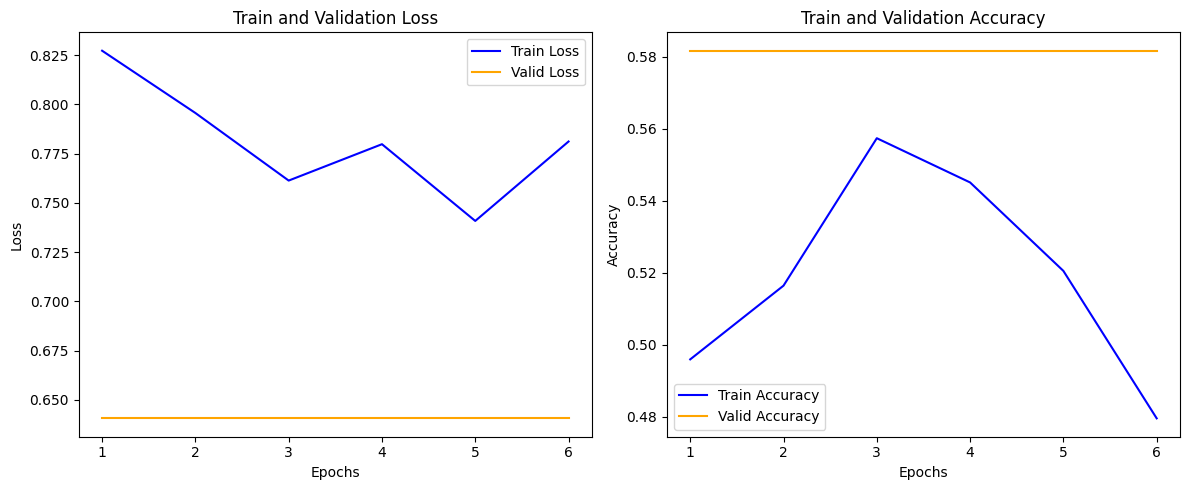

In [64]:
trainer.plot_metrics()

In [ ]:
runner = ImgRunner()

runner.train(
    model=model_mixed_lr,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(),
        dl.OptimizerCallback(),
        dl.AccuracyCallback()
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    main_metric="accuracy01",
    minimize_metric=False,
    logdir="logs/alexnet_mixed_lr"
)

1/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.58it/s, accuracy01=0.450, loss=2.791]
1/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.38it/s, accuracy01=0.840, loss=0.655]
[2020-11-15 10:27:51,282] 
1/10 * Epoch 1 (_base): lr=1.000e-06 | momentum=0.9000
1/10 * Epoch 1 (train): accuracy01=0.1680 | loss=7.5550
1/10 * Epoch 1 (valid): accuracy01=0.6601 | loss=1.5137
2/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.46it/s, accuracy01=0.900, loss=0.456]
2/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.43it/s, accuracy01=0.720, loss=1.557]
[2020-11-15 10:28:59,994] 
2/10 * Epoch 2 (_base): lr=1.000e-06 | momentum=0.9000
2/10 * Epoch 2 (train): accuracy01=0.8033 | loss=0.7463
2/10 * Epoch 2 (valid): accuracy01=0.8366 | loss=0.6349
3/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.41it/s, accuracy01=0.850, loss=0.287]
3/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.33it/s, accuracy01=0.880, loss=0.574]
[2020-11-15 10:30:11,650] 
3/10 * Epoch 3 (_base): lr=1.000e-06 | momentum=0.9000
3/10 * Epoch 3

### Другие, более современные нейросети

**Вопрос:** Какую стратегию Вы выберете, учитывая размер и специфику нового датасета?

**Ответ:** <Ваш ответ>

### ResNet 18

In [65]:
models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\ASUS/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:08<00:00, 5.31MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [73]:
# Ваш код здесь
model_extractor = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 512
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.fc = nn.Linear(num_features, 2)

# Обучаем только классификатор
optimizer = optim.Adam(model_extractor.fc.parameters(), lr=1e-3)

In [74]:
trainer = Trainer(
    model = model_extractor,
    criterion = nn.CrossEntropyLoss(),
    optimizer = optimizer,
    device = device,
    train_loader = train_dataloader,
    test_loader = val_dataloader,
    epochs = 20,
    #scheduler=optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
)

In [75]:
trainer.train_model()

Epoch 1/20 - Train Loss: 0.6140, Train Accuracy: 0.6557, Valid Loss: 0.4871, Valid Accuracy: 0.8627 - Time: 1.69s


Epoch 2/20 - Train Loss: 0.4630, Train Accuracy: 0.8607, Valid Loss: 0.3941, Valid Accuracy: 0.8954 - Time: 1.30s


Epoch 3/20 - Train Loss: 0.3818, Train Accuracy: 0.8730, Valid Loss: 0.3639, Valid Accuracy: 0.9085 - Time: 1.26s


Epoch 4/20 - Train Loss: 0.3223, Train Accuracy: 0.9016, Valid Loss: 0.3344, Valid Accuracy: 0.9216 - Time: 1.24s


Epoch 5/20 - Train Loss: 0.3073, Train Accuracy: 0.9016, Valid Loss: 0.2679, Valid Accuracy: 0.9085 - Time: 1.33s


Epoch 6/20 - Train Loss: 0.3027, Train Accuracy: 0.9139, Valid Loss: 0.3633, Valid Accuracy: 0.9216 - Time: 1.29s


Epoch 7/20 - Train Loss: 0.2561, Train Accuracy: 0.9385, Valid Loss: 0.2416, Valid Accuracy: 0.9216 - Time: 1.28s


Epoch 8/20 - Train Loss: 0.2683, Train Accuracy: 0.8934, Valid Loss: 0.3069, Valid Accuracy: 0.9346 - Time: 1.27s


Epoch 9/20 - Train Loss: 0.2866, Train Accuracy: 0.8975, Valid Loss: 0.2301, Valid Accuracy: 0.9216 - Time: 1.30s


Epoch 10/20 - Train Loss: 0.1857, Train Accuracy: 0.9508, Valid Loss: 0.2813, Valid Accuracy: 0.9346 - Time: 1.34s


Epoch 11/20 - Train Loss: 0.1888, Train Accuracy: 0.9426, Valid Loss: 0.2413, Valid Accuracy: 0.9412 - Time: 1.33s


Epoch 12/20 - Train Loss: 0.2047, Train Accuracy: 0.9303, Valid Loss: 0.2351, Valid Accuracy: 0.9412 - Time: 1.28s


Epoch 13/20 - Train Loss: 0.1814, Train Accuracy: 0.9467, Valid Loss: 0.2728, Valid Accuracy: 0.9346 - Time: 1.34s


Epoch 14/20 - Train Loss: 0.2068, Train Accuracy: 0.9139, Valid Loss: 0.2149, Valid Accuracy: 0.9412 - Time: 1.30s


Epoch 15/20 - Train Loss: 0.1652, Train Accuracy: 0.9590, Valid Loss: 0.2245, Valid Accuracy: 0.9477 - Time: 1.34s


Epoch 16/20 - Train Loss: 0.1712, Train Accuracy: 0.9508, Valid Loss: 0.2648, Valid Accuracy: 0.9346 - Time: 1.33s


Epoch 17/20 - Train Loss: 0.1967, Train Accuracy: 0.9344, Valid Loss: 0.2161, Valid Accuracy: 0.9477 - Time: 1.27s


Epoch 18/20 - Train Loss: 0.1802, Train Accuracy: 0.9467, Valid Loss: 0.2702, Valid Accuracy: 0.9346 - Time: 1.32s



Early stopping triggered after 18 epochs


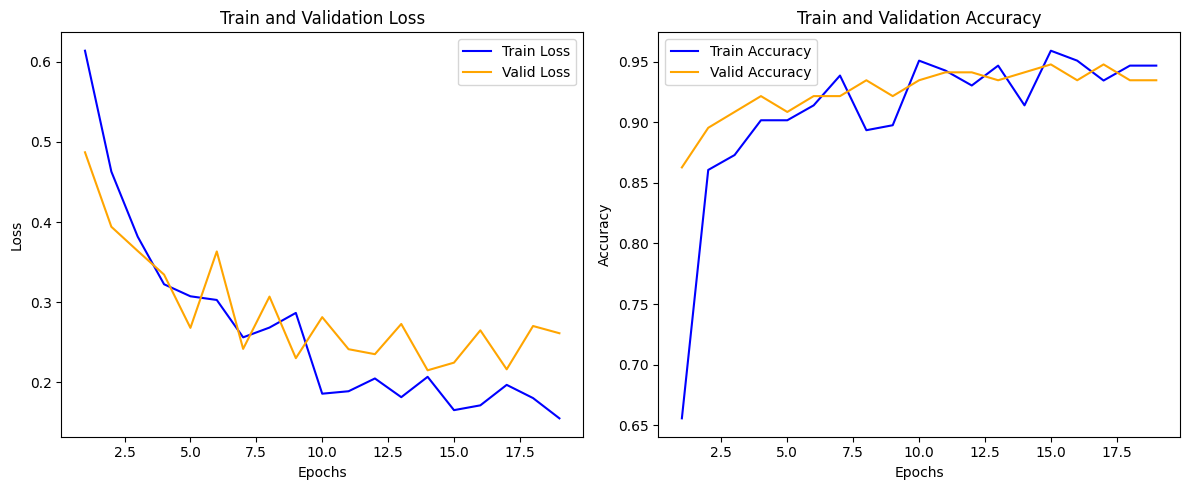

In [76]:
trainer.plot_metrics()

In [ ]:
runner = ImgRunner()

runner.train(
    model=model_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(),
        dl.OptimizerCallback(),
        dl.AccuracyCallback()
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    main_metric="accuracy01",
    minimize_metric=False,
    logdir="logs/resnet",
    load_best_on_end=True,
)

1/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.35it/s, accuracy01=0.650, loss=0.608]
1/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.21it/s, accuracy01=0.960, loss=0.427]
[2020-11-15 10:37:34,476] 
1/10 * Epoch 1 (_base): lr=0.0010 | momentum=0.9000
1/10 * Epoch 1 (train): accuracy01=0.5984 | loss=0.6645
1/10 * Epoch 1 (valid): accuracy01=0.7843 | loss=0.5094
2/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.58it/s, accuracy01=1.000, loss=0.401]
2/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.21it/s, accuracy01=0.680, loss=0.583]
[2020-11-15 10:37:38,990] 
2/10 * Epoch 2 (_base): lr=0.0010 | momentum=0.9000
2/10 * Epoch 2 (train): accuracy01=0.8033 | loss=0.5088
2/10 * Epoch 2 (valid): accuracy01=0.8693 | loss=0.4132
3/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.55it/s, accuracy01=0.850, loss=0.372]
3/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.17it/s, accuracy01=0.880, loss=0.343]
[2020-11-15 10:37:45,039] 
3/10 * Epoch 3 (_base): lr=0.0010 | momentum=0.9000
3/10 * Epoch 3 (train):

In [ ]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = True

optimizer = optim.Adam(model_extractor.parameters(), lr=1e-4)

runner = ImgRunner()

runner.train(
    model=model_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(),
        dl.OptimizerCallback(),
        dl.AccuracyCallback()
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    main_metric="accuracy01",
    minimize_metric=False,
    logdir="logs/resnet_step2",
    load_best_on_end=True,
)

1/10 * Epoch (train): 100% 8/8 [00:02<00:00,  2.81it/s, accuracy01=0.900, loss=0.254]
1/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.24it/s, accuracy01=0.880, loss=0.349]
[2020-11-15 10:38:33,420] 
1/10 * Epoch 1 (_base): lr=0.0001 | momentum=0.9000
1/10 * Epoch 1 (train): accuracy01=0.9098 | loss=0.2236
1/10 * Epoch 1 (valid): accuracy01=0.9412 | loss=0.2039
2/10 * Epoch (train): 100% 8/8 [00:02<00:00,  2.73it/s, accuracy01=1.000, loss=0.058]
2/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.17it/s, accuracy01=0.880, loss=0.316]
[2020-11-15 10:38:43,453] 
2/10 * Epoch 2 (_base): lr=0.0001 | momentum=0.9000
2/10 * Epoch 2 (train): accuracy01=0.9590 | loss=0.1015
2/10 * Epoch 2 (valid): accuracy01=0.9346 | loss=0.2288
3/10 * Epoch (train): 100% 8/8 [00:02<00:00,  2.74it/s, accuracy01=0.950, loss=0.134]
3/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.23it/s, accuracy01=0.880, loss=0.577]
[2020-11-15 10:38:53,160] 
3/10 * Epoch 3 (_base): lr=0.0001 | momentum=0.9000
3/10 * Epoch 3 (train):


<h2 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *cs231n: http://cs231n.github.io/transfer-learning/*

2). *Туториал на PyTorch Tutorials: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial*

3). *Статья на Medium про TL в PyTorch: https://medium.com/@14prakash/almost-any-image-classification-problem-using-pytorch-i-am-in-love-with-pytorch-26c7aa979ec4*  